In [6]:
#-*- coding: cp949 -*-
#-*- coding: utf-8 -*- 
# It shows classification
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mglearn
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from matplotlib import rc
import matplotlib.font_manager as fm
%matplotlib notebook
%matplotlib inline
fm.get_fontconfig_fonts()
font_location = "c:/Windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
mpl.rc('font', family=font_name)

In [7]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() \n{}".format(cancer.keys()))

cancer.keys() 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
print("유방암 데이터의 형태 : {}".format(cancer.data.shape))

유방암 데이터의 형태 : (569, 30)


In [9]:
print("클래스별 샘플 개수:\n{}".format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [10]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


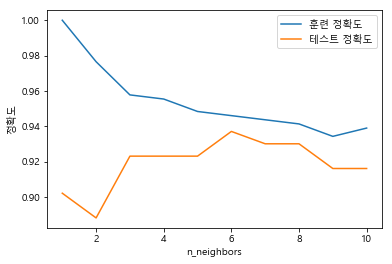

In [12]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 66)
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train,y_train)
    # 훈련 세트 정확도 저장
    training_accuracy. append(clf.score(X_train,y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label = "훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()